<a href="https://colab.research.google.com/github/nitinware/GoogleCloabNotebooks/blob/master/coursera/Intro_TF/Cours2_Week4_rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-12-23 00:40:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.164.144, 172.217.7.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   158MB/s    in 1.2s    

2020-12-23 00:40:37 (158 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-12-23 00:40:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tm

In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rps-test-set.zip' mode='r'>>

In [4]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock03-051.png', 'rock06ck02-085.png', 'rock06ck02-068.png', 'rock05ck01-047.png', 'rock07-k03-109.png', 'rock05ck01-010.png', 'rock07-k03-011.png', 'rock07-k03-081.png', 'rock07-k03-090.png', 'rock02-032.png']
['paper05-040.png', 'paper04-036.png', 'paper01-059.png', 'paper05-024.png', 'paper01-016.png', 'paper05-053.png', 'paper07-117.png', 'paper04-101.png', 'paper06-049.png', 'paper05-046.png']
['scissors03-057.png', 'scissors01-045.png', 'testscissors01-069.png', 'testscissors01-117.png', 'scissors02-042.png', 'testscissors01-076.png', 'testscissors01-048.png', 'scissors02-006.png', 'testscissors03-000.png', 'scissors02-070.png']


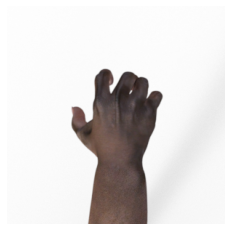

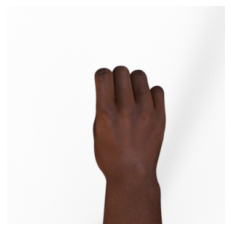

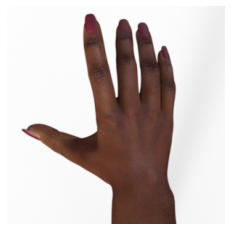

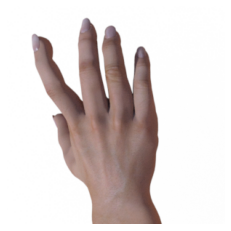

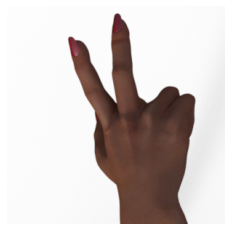

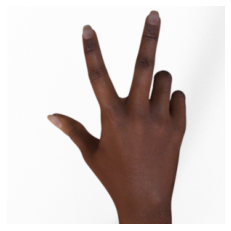

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 5

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [6]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [8]:
TRAINING_DIR = '/tmp/rps'

training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
VALIDATION_DIR = '/tmp/rps-test-set/'

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.


In [11]:
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 372 images belonging to 3 classes.


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    epochs=25,
    steps_per_epoch=20,
    validation_data=validation_generator,
    verbose=1,
    validation_steps=3
)

Epoch 1/25
20/20 [==============================] - 28s 1s/step - loss: 1.6581 - accuracy: 0.3377 - val_loss: 1.0942 - val_accuracy: 0.5833
Epoch 2/25
20/20 [==============================] - 21s 1s/step - loss: 1.1024 - accuracy: 0.3588 - val_loss: 1.1003 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 21s 1s/step - loss: 1.0942 - accuracy: 0.3753 - val_loss: 0.7326 - val_accuracy: 0.8172
Epoch 4/25
20/20 [==============================] - 20s 1s/step - loss: 1.0560 - accuracy: 0.4585 - val_loss: 0.8689 - val_accuracy: 0.6532
Epoch 5/25
20/20 [==============================] - 21s 1s/step - loss: 0.9174 - accuracy: 0.5545 - val_loss: 0.6995 - val_accuracy: 0.7608
Epoch 6/25
20/20 [==============================] - 21s 1s/step - loss: 0.7636 - accuracy: 0.6802 - val_loss: 0.5313 - val_accuracy: 0.7285
Epoch 7/25
20/20 [==============================] - 20s 1s/step - loss: 0.6287 - accuracy: 0.7225 - val_loss: 0.1815 - val_accuracy: 0.9489
Epoch 8/25
20/20 [==

In [16]:
model.save("rps.h5")

In [17]:
import matplotlib.pyplot as plt

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

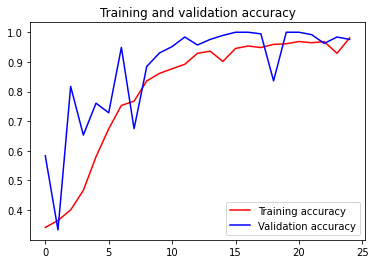

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [21]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper-hires1.png to paper-hires1 (1).png
Saving rock-hires1.png to rock-hires1.png
Saving scissors-hires1.png to scissors-hires1.png
paper-hires1.png
[[1. 0. 0.]]
rock-hires1.png
[[0. 1. 0.]]
scissors-hires1.png
[[0. 0. 1.]]
